# **Step 1 Downlode libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Step 2  Read Dataset**

In [21]:
!unzip -q /content/archive.zip

unzip:  cannot find or open /content/archive.zip, /content/archive.zip.zip or /content/archive.zip.ZIP.


In [23]:
df=pd.read_csv('/content/data/archive.zip')
df.head()

,name,city,gender,profession,age,cgpa,placed
0,moriarity,NaN,female,phd,28.0,5.94,1
1,moriarity,asgard,NaN,bachelor,50.0,8.55,0
2,holmes,NaN,female,masters,18.0,5.56,0
3,sam,NaN,male,bachelor,25.0,8.57,1
4,sam,NaN,male,bachelor,19.0,8.76,1


In [24]:
df.tail()

,name,city,gender,profession,age,cgpa,placed
1095,holmes,NaN,male,masters,26.0,8.92,1
1096,moriarity,wakanda,male,masters,19.0,9.01,0
1097,sam,asgard,male,bachelor,30.0,7.88,0
1098,dean,gotham,male,masters,28.0,NaN,1
1099,sam,asgard,NaN,masters,24.0,8.94,1


# **Step 3 Sanity check of Data**

In [25]:
df.shape

(1100, 7)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1009 non-null   object 
 1   city        905 non-null    object 
 2   gender      994 non-null    object 
 3   profession  921 non-null    object 
 4   age         982 non-null    float64
 5   cgpa        962 non-null    float64
 6   placed      1100 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 60.3+ KB


In [27]:
#finding missing values
df.isnull().sum()

,0
name,91
city,195
gender,106
profession,179
age,118
cgpa,138
placed,0


In [28]:
#calculating the percentage of missing values if exist
df.isnull().sum()/df.shape[0]*100

,0
name,8.272727
city,17.727273
gender,9.636364
profession,16.272727
age,10.727273
cgpa,12.545455
placed,0.000000


In [29]:
#find duplicates
df.duplicated().sum()

np.int64(65)

In [30]:
#identify garbage values
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("****"*10)

name
moriarity    280
sam          257
holmes       163
dean          97
bobby         83
watson        68
sherlock      48
castiel       13
Name: count, dtype: int64
****************************************
city
wakanda       391
gotham        243
asgard        152
purgatory     119
Name: count, dtype: int64
****************************************
gender
male      760
female    234
Name: count, dtype: int64
****************************************
profession
bachelor    517
masters     273
phd         131
Name: count, dtype: int64
****************************************


# **Step 4 Expository Data Analysis**

In [31]:
#descriptive statistics
df.describe()

,age,cgpa,placed
count,982.000000,962.000000,1100.000000
mean,28.429735,7.609033,0.499091
std,9.141244,1.495991,0.500227
min,18.000000,4.010000,0.000000
25%,22.000000,7.170000,0.000000
50%,26.000000,7.925000,0.000000
75%,30.000000,8.760000,1.000000
max,50.000000,9.490000,1.000000


In [32]:
df.describe(include="object").T

,count,unique,top,freq
name,1009,8,moriarity,280
city,905,4,wakanda,391
gender,994,2,male,760
profession,921,3,bachelor,517


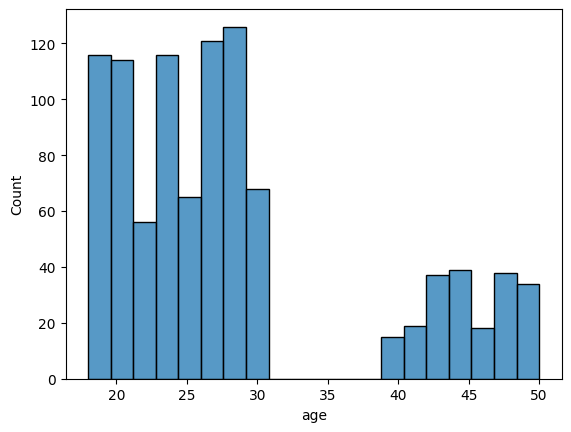

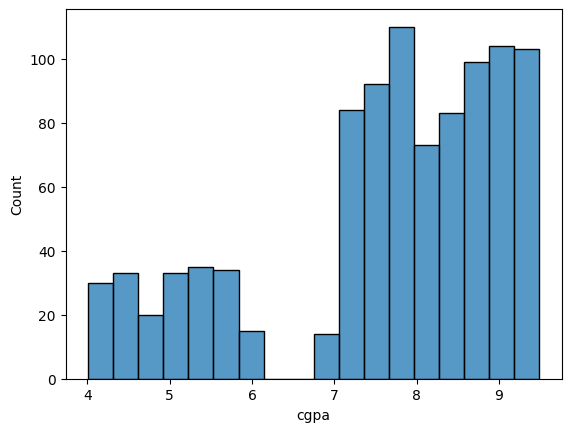

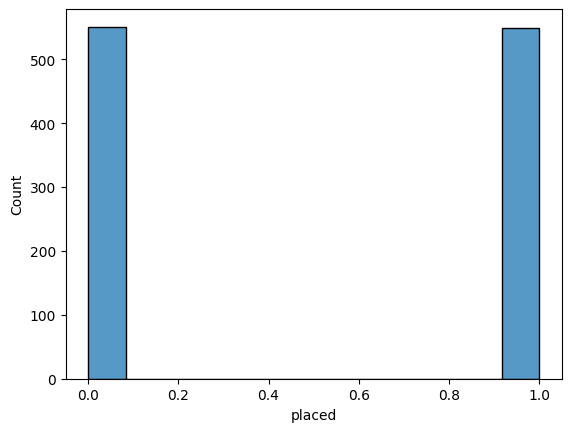

In [33]:
#histogram to understand distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

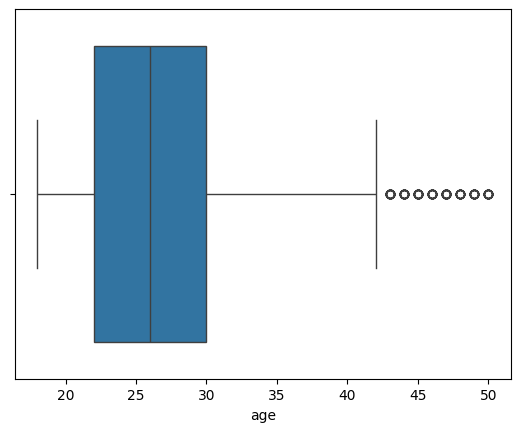

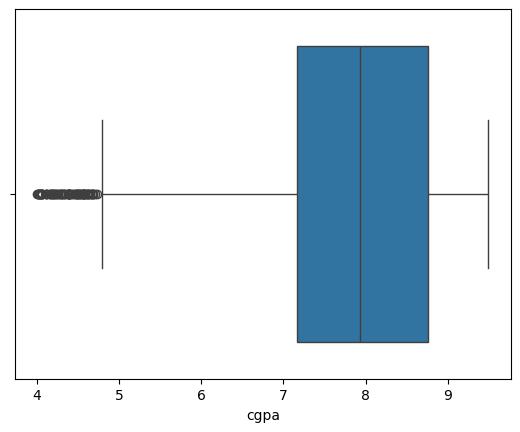

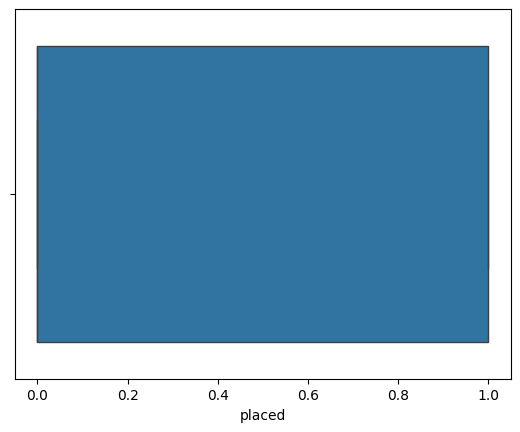

In [34]:
#Boxplot to identify Outliers
#histogram to understand distribution
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

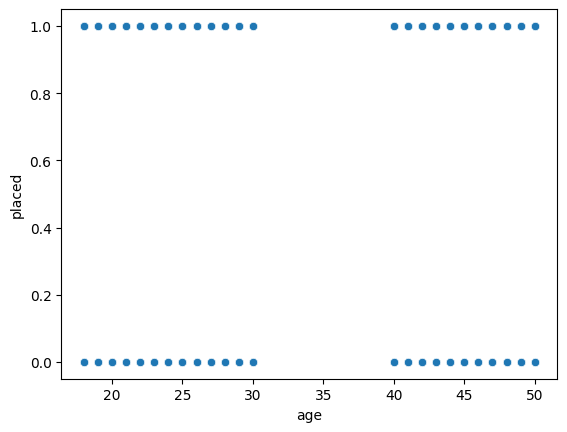

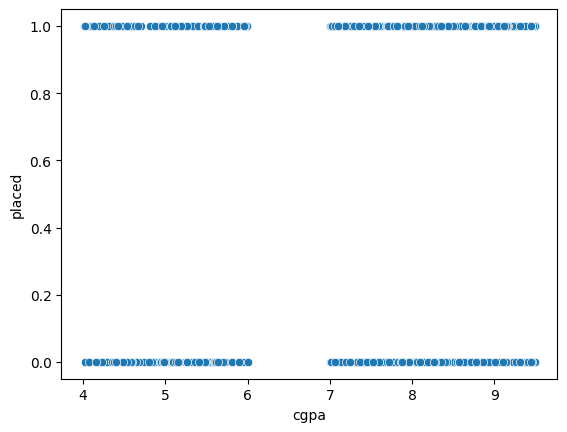

In [37]:
#scatter plot to understand the relationship
for i in ['age', 'cgpa']:
  sns.scatterplot(data=df,x=i,y='placed')
  plt.show()


In [36]:
df.select_dtypes(include="number").columns

Index(['age', 'cgpa', 'placed'], dtype='object')

In [39]:
#correlation with heatmap to interpret the relation and multicollinarity
s=df.select_dtypes(include="number").corr()


<Axes: >

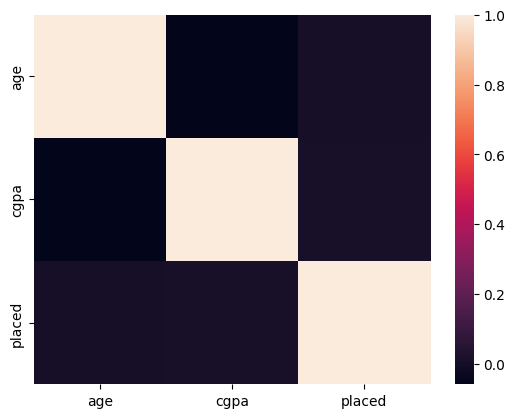

In [41]:
sns.heatmap(s)

# **Step 5 Missing Value Treatment**

In [47]:
#choosing the method of imputingn  missing value
#like mean,median mode or KNNIputer

for i in ["name", "city", "gender", "profession"]:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [49]:
for i in ["age", "cgpa"]:
    df[i].fillna(df[i].median(), inplace=True)

/tmp/ipython-input-491620691.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)


In [50]:
df.isnull().sum()

,0
name,0
city,0
gender,0
profession,0
age,0
cgpa,0
placed,0


In [ ]:
from sklearn import KNNimputer
impute=KNNimputer(n_neighbors=3,weights="uniform")
impute.fit

# **Step 6  Outlier Treatment**

In [ ]:
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw

In [ ]:
wisker()